In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
from bs4 import BeautifulSoup
import string,unicodedata
from sklearn.feature_extraction.text import CountVectorizer
from plotly.subplots import make_subplots
import plotly.graph_objects as go


In [89]:
df = pd.read_csv("/content/Sudan internal conflicts Reddit Scrape.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [90]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,body,category,communityName,createdAt,dataType,description,flair,html,id,isAd,...,postId,scrapedAt,thumbnailUrl,title,upVoteRatio,upVotes,url,userIcon,userId,username
0,NaN,NaN,NaN,2021-01-31T03:02:38.000Z,user,Here you can see some rare combat footages aro...,NaN,NaN,6wo2ays6,NaN,...,NaN,2024-06-18T15:33:59.120Z,NaN,NaN,NaN,NaN,https://www.reddit.com/user/beoformation/,https://styles.redditmedia.com/t5_3uyyfi/style...,NaN,beoformation
1,URL: https://i.redd.it/741oufea1ew51.png\nThum...,NaN,r/PoliticalCompassMemes,2020-10-31T08:06:55.000Z,post,NaN,NaN,NaN,t3_jlenuw,False,...,NaN,2024-06-18T15:34:15.689Z,https://b.thumbs.redditmedia.com/HAtw7Uf1mgemD...,AuthRight has an internal conflict,0.93,26515.0,https://www.reddit.com/r/PoliticalCompassMemes...,NaN,t2_2bggjpdi,SirGhallahad
2,"It’s true, because Hitler caused the Holocaust.",PoliticalCompassMemes,r/PoliticalCompassMemes,2020-10-31T11:56:44.000Z,comment,NaN,NaN,"&lt;div class=""md""&gt;&lt;p&gt;It’s true, beca...",t1_gaow8ak,NaN,...,t3_jlenuw,2024-06-18T15:34:25.325Z,NaN,NaN,NaN,2.0,https://www.reddit.com/r/PoliticalCompassMemes...,NaN,t2_156aui,vig1141
3,Actual Nazis: *eating popcorn from authcenter*,PoliticalCompassMemes,r/PoliticalCompassMemes,2020-10-31T08:53:57.000Z,comment,NaN,NaN,"&lt;div class=""md""&gt;&lt;p&gt;Actual Nazis: &...",t1_gaomhy8,NaN,...,t3_jlenuw,2024-06-18T15:34:15.777Z,NaN,NaN,NaN,3389.0,https://www.reddit.com/r/PoliticalCompassMemes...,NaN,t2_5ioq4hg2,Belkan-Federation
4,“Trump is worse than Hitler”\n\nYes,PoliticalCompassMemes,r/PoliticalCompassMemes,2020-10-31T11:16:49.000Z,comment,NaN,NaN,"&lt;div class=""md""&gt;&lt;p&gt;“Trump is worse...",t1_gaotut6,NaN,...,t3_jlenuw,2024-06-18T15:34:15.777Z,NaN,NaN,NaN,1839.0,https://www.reddit.com/r/PoliticalCompassMemes...,NaN,t2_6keblayy,SQRT_2214144


Data Processing

In [91]:
df = df.iloc[:, :1]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [92]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,body
0,NaN
1,URL: https://i.redd.it/741oufea1ew51.png\nThum...
2,"It’s true, because Hitler caused the Holocaust."
3,Actual Nazis: *eating popcorn from authcenter*
4,“Trump is worse than Hitler”\n\nYes


In [93]:
#Handling missing values
df = df.dropna()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [94]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,body
1,URL: https://i.redd.it/741oufea1ew51.png\nThum...
2,"It’s true, because Hitler caused the Holocaust."
3,Actual Nazis: *eating popcorn from authcenter*
4,“Trump is worse than Hitler”\n\nYes
5,“Trump is worse than Hitler”\n\n“I know right?...


In [95]:
mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot",
           "'cause": "because", "could've": "could have", "couldn't": "could not",
           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not",
           "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will",
           "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will",
           "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will",
           "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have",
           "i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have",
           "it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not",
           "might've": "might have","mightn't": "might not","mightn't've": "might not have",
           "must've": "must have", "mustn't": "must not", "mustn't've": "must not have",
           "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
           "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would",
           "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have",
           "she's": "she is", "should've": "should have", "shouldn't": "should not",
           "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is",
           "that'd": "that would", "that'd've": "that would have", "that's": "that is",
           "there'd": "there would", "there'd've": "there would have", "there's": "there is",
           "here's": "here is","they'd": "they would", "they'd've": "they would have",
           "they'll": "they will", "they'll've": "they will have", "they're": "they are",
           "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would",
           "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have",
           "we're": "we are", "we've": "we have", "weren't": "were not",
           "what'll": "what will", "what'll've": "what will have","what're": "what are",
           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have",
           "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will",
           "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is",
           "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have",
           "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have",
           "y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
           "you're": "you are", "you've": "you have" }

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [96]:
# Function to remove HTMl tags
def remove_html_tags(text):
  soup=BeautifulSoup(text, "html.parser")
  return soup.get_text()

# Assuming Processed Reddit is the column with HTML content
df['Clean body'] = df['body'].apply(remove_html_tags)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-96-34f7a9b0340c>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup=BeautifulSoup(text, "html.parser")


In [97]:
# Remove URLs and Special characters with Regular Expressions
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URL
    text = re.sub(r'\S*@\S*\s?', '', text)  # Remove mailboxes
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    text = ' '.join([mapping[t] if t in mapping else t for t in text.split(" ")]) #expanding chatwords and contracts clearing contractions
    emoji_clean= re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_clean.sub(r'',text)
    return text

df['Clean body'] = df['Clean body'].apply(clean_text)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [98]:
df['Clean body']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1                         URL \nThumbnail \nImages\n\t\n
2           Its true because Hitler caused the Holocaust
3            Actual Nazis eating popcorn from authcenter
4                      Trump is worse than Hitler\n\nYes
5      Trump is worse than Hitler\n\nI know right He ...
                             ...                        
496                                              Society
497                                           Same thing
498                        Straight traps can be a thing
499    Yes but if you like traps youre ghey Either yo...
500    If youre a straight man then looking at straig...
Name: Clean body, Length: 500, dtype: object

In [99]:
# Text preprocessing using NLTK or spaCy: word splitting, deletion of stop words, word shape reduction
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download the necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [100]:
stopwords = nltk.corpus.stopwords.words('english')
Clean_text = [word for word in df if word.lower() not in stopwords]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [101]:
lemmatizer = WordNetLemmatizer()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [102]:
# of pre-processed text
def preprocess_text(df):
    text = df.lower()
    words = df.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stopwords]
    return ' '.join(words)

df['Processed body'] = df['Clean body'].apply(preprocess_text)
df['Processed body']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1                                   URL Thumbnail Images
2                       Its true Hitler caused Holocaust
3                 Actual Nazis eating popcorn authcenter
4                                 Trump worse Hitler Yes
5      Trump worse Hitler I know right He let daughte...
                             ...                        
496                                              Society
497                                           Same thing
498                                  Straight trap thing
499    Yes like trap youre ghey Either guy who guy gi...
500    If youre straight man looking straight trap po...
Name: Processed body, Length: 500, dtype: object

In [103]:
df.to_csv('Processed_dataset_withsentiment.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Keyword Extraction

In [104]:
# Extract keywords using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(df['Processed body'])
tfidf

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<500x503 sparse matrix of type '<class 'numpy.float64'>'
	with 2288 stored elements in Compressed Sparse Row format>

In [105]:
# Convert to array and get feature names (vocabulary)
feature_array = tfidf_vectorizer.get_feature_names_out()
tfidf_sorting = tfidf.toarray().argsort()[:, ::-1]

# Get the first N keywords of each document
n = 3
top_n_keywords = feature_array[tfidf_sorting][:,:n]
top_n_keywords

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([['youre', 'going', 'fun'],
       ['true', 'caused', 'holocaust'],
       ['actual', 'authcenter', 'nazis'],
       ...,
       ['straight', 'trap', 'thing'],
       ['girl', 'guy', 'like'],
       ['straight', 'trap', 'man']], dtype=object)

Sentiment Analysis

In [62]:
nltk.download('vader_lexicon')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [106]:
# Sentiment analysis using VADER
sid = SentimentIntensityAnalyzer()
df['Sentiments'] = df['Processed body'].apply(lambda x: sid.polarity_scores(x))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [107]:
df['Sentiments']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1      {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2      {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp...
3      {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4      {'neg': 0.397, 'neu': 0.256, 'pos': 0.346, 'co...
5      {'neg': 0.256, 'neu': 0.744, 'pos': 0.0, 'comp...
                             ...                        
496    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
497    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
498    {'neg': 0.442, 'neu': 0.192, 'pos': 0.365, 'co...
499    {'neg': 0.11, 'neu': 0.524, 'pos': 0.367, 'com...
500    {'neg': 0.143, 'neu': 0.621, 'pos': 0.236, 'co...
Name: Sentiments, Length: 500, dtype: object

In [108]:
# VADER Sentiment analysis categorisation
def classify_sentiment_vader(scores):
    if scores['compound'] >= 0.05:
        return 'positive'
    elif scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['VADER Sentiment'] = df['Sentiments'].apply(classify_sentiment_vader)
df['VADER Sentiment']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1       neutral
2      positive
3       neutral
4      negative
5      negative
         ...   
496     neutral
497     neutral
498    negative
499    positive
500    positive
Name: VADER Sentiment, Length: 500, dtype: object

In [109]:
# Sentiment analysis using TextBlob (alternative)
df['TextBlob Sentiment'] = df['Processed body'].apply(lambda x: TextBlob(x).sentiment.polarity)
def classify_sentiment_textblob(score):
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

df['TextBlob Sentiment Category'] = df['TextBlob Sentiment'].apply(classify_sentiment_textblob)
df['TextBlob Sentiment Category']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1       neutral
2      positive
3       neutral
4      negative
5      negative
         ...   
496     neutral
497     neutral
498    positive
499     neutral
500    positive
Name: TextBlob Sentiment Category, Length: 500, dtype: object

In [110]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,body,Clean body,Processed body,Sentiments,VADER Sentiment,TextBlob Sentiment,TextBlob Sentiment Category
1,URL: https://i.redd.it/741oufea1ew51.png\nThum...,URL \nThumbnail \nImages\n\t\n,URL Thumbnail Images,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral,0.000000,neutral
2,"It’s true, because Hitler caused the Holocaust.",Its true because Hitler caused the Holocaust,Its true Hitler caused Holocaust,"{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp...",positive,0.350000,positive
3,Actual Nazis: *eating popcorn from authcenter*,Actual Nazis eating popcorn from authcenter,Actual Nazis eating popcorn authcenter,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral,0.000000,neutral
4,“Trump is worse than Hitler”\n\nYes,Trump is worse than Hitler\n\nYes,Trump worse Hitler Yes,"{'neg': 0.397, 'neu': 0.256, 'pos': 0.346, 'co...",negative,-0.400000,negative
5,“Trump is worse than Hitler”\n\n“I know right?...,Trump is worse than Hitler\n\nI know right He ...,Trump worse Hitler I know right He let daughte...,"{'neg': 0.256, 'neu': 0.744, 'pos': 0.0, 'comp...",negative,-0.057143,negative


In [111]:
df.to_csv('Processed_dataset_withsentiment.csv', index = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic Modeling

In [69]:
nltk.download('punkt')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [112]:
from collections import defaultdict
texts = [word_tokenize(doc) for doc in df['Processed body'] if word_tokenize(doc)]
# Remove very low-frequency words
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

texts = [[token for token in text if frequency[token] > 1] for text in texts]

dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

ldamodel = LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [113]:
topics = ldamodel.print_topics(num_words=2)
for topic in topics:
    print(topic)

(0, '0.046*"Hitler" + 0.031*"Flair"')
(1, '0.060*"deleted" + 0.043*"worse"')
(2, '0.049*"Hitler" + 0.043*"removed"')
(3, '0.037*"happened" + 0.033*"holocaust"')
(4, '0.030*"like" + 0.025*"I"')
(5, '0.025*"Hitler" + 0.023*"like"')
(6, '0.041*"million" + 0.026*"Jews"')
(7, '0.045*"I" + 0.023*"comment"')
(8, '0.057*"I" + 0.042*"Hitler"')
(9, '0.079*"Based" + 0.030*"Count"')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [114]:
topics = ldamodel.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.046*"Hitler" + 0.031*"Flair" + 0.021*"Trump" + 0.020*"holocaust" + 0.017*"trash"')
(1, '0.060*"deleted" + 0.043*"worse" + 0.042*"Trump" + 0.036*"Hitler" + 0.026*"Yes"')
(2, '0.049*"Hitler" + 0.043*"removed" + 0.036*"worse" + 0.022*"Jews" + 0.022*"And"')
(3, '0.037*"happened" + 0.033*"holocaust" + 0.027*"I" + 0.021*"one" + 0.021*"Im"')
(4, '0.030*"like" + 0.025*"I" + 0.018*"left" + 0.014*"Hitler" + 0.014*"ideology"')
(5, '0.025*"Hitler" + 0.023*"like" + 0.020*"I" + 0.019*"something" + 0.015*"could"')
(6, '0.041*"million" + 0.026*"Jews" + 0.022*"I" + 0.020*"way" + 0.019*"guy"')
(7, '0.045*"I" + 0.023*"comment" + 0.020*"Jews" + 0.015*"thing" + 0.015*"Holocaust"')
(8, '0.057*"I" + 0.042*"Hitler" + 0.038*"Holocaust" + 0.031*"The" + 0.027*"happened"')
(9, '0.079*"Based" + 0.030*"Count" + 0.017*"least" + 0.017*"You" + 0.013*"bad"')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [73]:
pip install pyLDAvis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [115]:
# Lets visualize the topics
import pyLDAvis
from pyLDAvis.gensim import prepare

pyLDAvis.enable_notebook()
vis = prepare(ldamodel, corpus, dictionary)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.087310  0.095030       1        1  16.512675
4     -0.001968  0.054511       2        1  13.391162
1      0.130291 -0.137131       3        1   9.983936
7     -0.057909  0.031721       4        1   9.688348
5     -0.030075 -0.051720       5        1   9.606662
3     -0.041619  0.134983       6        1   9.519641
6     -0.093319  0.009182       7        1   8.546128
2      0.085392 -0.022334       8        1   8.262089
9     -0.171360 -0.109570       9        1   7.363723
0      0.093257 -0.004671      10        1   7.125637, topic_info=        Term       Freq      Total Category  logprob  loglift
192    Based  20.000000  20.000000  Default  30.0000  30.0000
191  deleted  20.000000  20.000000  Default  29.0000  29.0000
0     Hitler  76.000000  76.000000  Default  28.0000  28.0000
69   removed  12.000000  12.000000  Default  27.0000  27.0000
10     worse  38.000000  38.000000  Default  26.0000  26.0000
..       ...        ...        ...      ...      ...      ...
56      like   3.324961  38.475288  Topic10  -4.2536   0.1929
122      say   1.975176  19.295845  Topic10  -4.7744   0.3622
213    didnt   1.814871  20.196542  Topic10  -4.8590   0.2320
85       The   1.650419  32.150106  Topic10  -4.9540  -0.3279
252      You   1.650381  14.715850  Topic10  -4.9540   0.4536

[531 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
270       6  0.206899     1
270       9  0.620696     1
297       6  0.602798    10
297       7  0.301399    10
482       5  0.811497  2020
...     ...       ...   ...
68        5  0.483298  year
365       1  0.176003   yes
365       5  0.352006   yes
365      10  0.352006   yes
480       4  0.908749   yuw

[931 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 5, 2, 8, 6, 4, 7, 3, 10, 1])

In [116]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,body,Clean body,Processed body,Sentiments,VADER Sentiment,TextBlob Sentiment,TextBlob Sentiment Category
1,URL: https://i.redd.it/741oufea1ew51.png\nThum...,URL \nThumbnail \nImages\n\t\n,URL Thumbnail Images,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral,0.000000,neutral
2,"It’s true, because Hitler caused the Holocaust.",Its true because Hitler caused the Holocaust,Its true Hitler caused Holocaust,"{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp...",positive,0.350000,positive
3,Actual Nazis: *eating popcorn from authcenter*,Actual Nazis eating popcorn from authcenter,Actual Nazis eating popcorn authcenter,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral,0.000000,neutral
4,“Trump is worse than Hitler”\n\nYes,Trump is worse than Hitler\n\nYes,Trump worse Hitler Yes,"{'neg': 0.397, 'neu': 0.256, 'pos': 0.346, 'co...",negative,-0.400000,negative
5,“Trump is worse than Hitler”\n\n“I know right?...,Trump is worse than Hitler\n\nI know right He ...,Trump worse Hitler I know right He let daughte...,"{'neg': 0.256, 'neu': 0.744, 'pos': 0.0, 'comp...",negative,-0.057143,negative


In [119]:
len(df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


498

In [118]:
df.drop(df.tail(2).index,
        inplace = True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [120]:
# Assume you already have a DataFrame containing documents, their most relevant topics, and sentiment scores
# We can get the most likely topic for each document through the LDA model
document_topics = [ldamodel[corpus[i]] for i in range(len(df))]
df['Dominant_Topic'] = [sorted(topics, key=lambda x: -x[1])[0][0] for topics in document_topics]

df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,body,Clean body,Processed body,Sentiments,VADER Sentiment,TextBlob Sentiment,TextBlob Sentiment Category,Dominant_Topic
1,URL: https://i.redd.it/741oufea1ew51.png\nThum...,URL \nThumbnail \nImages\n\t\n,URL Thumbnail Images,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral,0.000000,neutral,0
2,"It’s true, because Hitler caused the Holocaust.",Its true because Hitler caused the Holocaust,Its true Hitler caused Holocaust,"{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp...",positive,0.350000,positive,8
3,Actual Nazis: *eating popcorn from authcenter*,Actual Nazis eating popcorn from authcenter,Actual Nazis eating popcorn authcenter,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral,0.000000,neutral,7
4,“Trump is worse than Hitler”\n\nYes,Trump is worse than Hitler\n\nYes,Trump worse Hitler Yes,"{'neg': 0.397, 'neu': 0.256, 'pos': 0.346, 'co...",negative,-0.400000,negative,1
5,“Trump is worse than Hitler”\n\n“I know right?...,Trump is worse than Hitler\n\nI know right He ...,Trump worse Hitler I know right He let daughte...,"{'neg': 0.256, 'neu': 0.744, 'pos': 0.0, 'comp...",negative,-0.057143,negative,1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


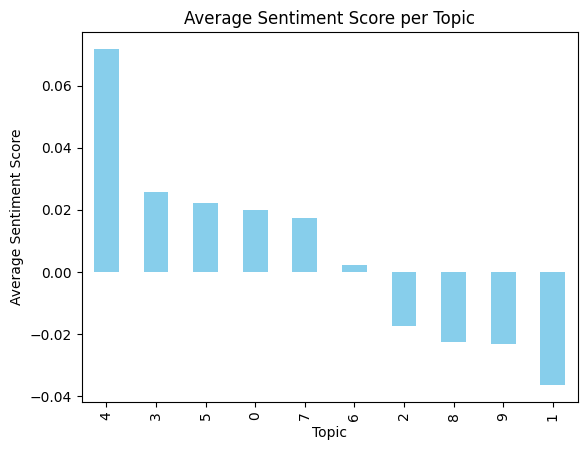

In [121]:
# Next, we calculate the average sentiment score for each topic
# Suppose we already have a column 'Sentiment_Score' in our DataFrame, representing the sentiment score
topic_sentiment = df.groupby('Dominant_Topic')['TextBlob Sentiment'].mean().sort_values(ascending=False)

# Visualize the average sentiment score for each topic
topic_sentiment.plot(kind='bar', color='skyblue')
plt.title('Average Sentiment Score per Topic')
plt.xlabel('Topic')
plt.ylabel('Average Sentiment Score')
plt.show()

N-gram

In [122]:
def get_top_ngram(corpus, n):
    lis=[]
    vec = CountVectorizer(ngram_range = (n,n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis = 0)
    for word,idx in vec.vocabulary_.items():
        lis.append((word, sum_words[0,idx]))
    lis.sort(key = lambda x: x[1], reverse = True)
    return lis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: title={'center': 'Top 20 frequently occured uni-gram'}>

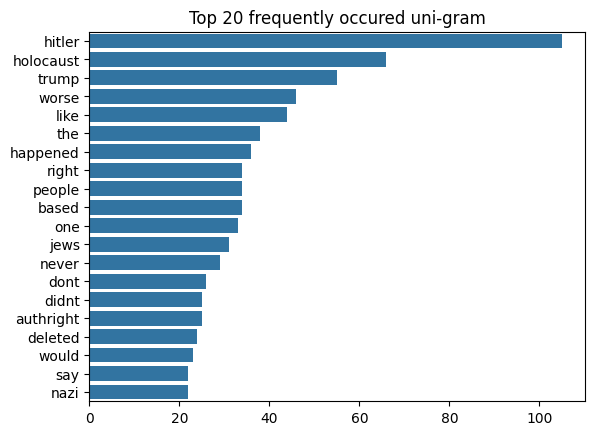

In [123]:
top_n_bigrams=get_top_ngram(df['Processed body'],1)[:20]
x,y=map(list,zip(*top_n_bigrams))
plt.title('Top 20 frequently occured uni-gram')
sns.barplot(x=y,y=x)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: title={'center': 'Top 20 frequently occured bi-grams'}>

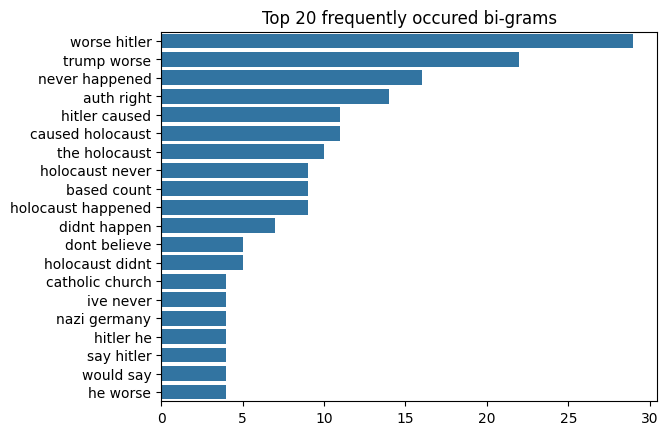

In [124]:
top_n_bigrams=get_top_ngram(df['Processed body'],2)[:20]
x,y=map(list,zip(*top_n_bigrams))
plt.title('Top 20 frequently occured bi-grams')
sns.barplot(x=y,y=x)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: title={'center': 'Top 20 frequently occured tri-grams'}>

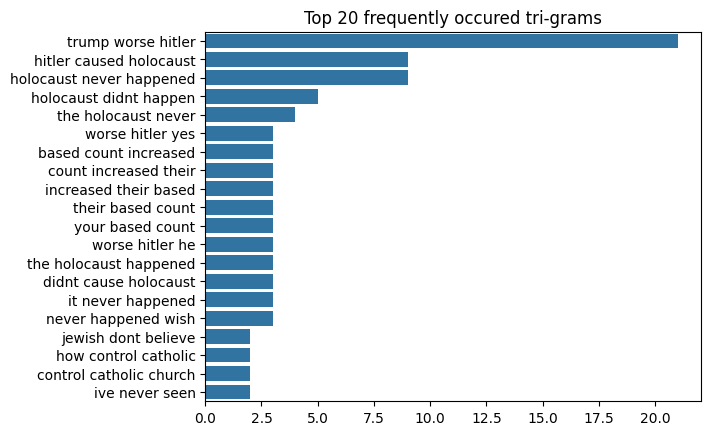

In [125]:
top_n_bigrams=get_top_ngram(df['Processed body'],3)[:20]
x,y=map(list,zip(*top_n_bigrams))
plt.title('Top 20 frequently occured tri-grams')
sns.barplot(x=y,y=x)

Visualisation

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


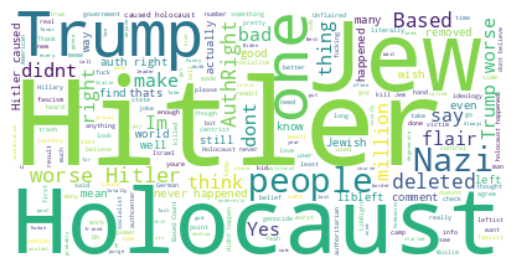

In [126]:
# WordCloud
text = ' '.join(review for review in df['Processed body'])
wordcloud = WordCloud(background_color='white').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()